In [28]:
# Loop over files and get features
import os, glob, os.path, shutil
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import json


imgdir = "/Users/cironola/CandlesFaceImages/Run_ToCluster_MIN15_60/BTCUSDT"
targetdir = "/Users/cironola/CandlesFaceImages/Clustered_MIN15_60/BTCUSDT"

In [29]:
filelist = glob.glob(os.path.join(imgdir, '*.gif'))
filelist.sort()
featurelist = []
lengthList = []
for i, imagepath in enumerate(filelist):
    print("    Status: %s / %s" %(i, len(filelist)), end="\r")

    features = []
    f = open(imagepath.replace("gif","json"))
    try:        
        data = json.load(f)
        for key, value in data.items():            
            #features.append(float(key))
            for item in value:
                fitem = float(item)
                features.append(fitem)

        # if(len(features) == 150):
        #     features.append(float(0))
        #     features.append(float(0))
        #     features.append(float(0))
        #     features.append(float(0))
        #     features.append(float(0))

        lengthList.append(len(features))
            
        featurelist.append(features)

    finally:
        f.close()

print(np.unique(lengthList))

[732]


1/47
2/47
3/47
4/47
5/47
6/47
7/47
8/47
9/47
10/47
11/47
12/47
13/47
14/47
15/47
16/47
17/47
18/47
19/47
20/47
21/47
22/47
23/47
24/47
25/47
26/47
27/47
28/47
29/47
30/47
31/47
32/47
33/47
34/47
35/47
36/47
37/47
38/47
39/47
40/47
41/47
42/47
43/47
44/47
45/47
46/47
47/47


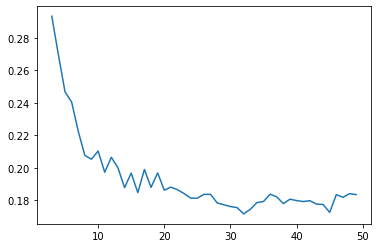

In [30]:
import matplotlib.pyplot as plt

clusterConfigs = []
number=3
while number < 50:
    clusterConfigs.append(number)
    number += 1

silScores = []
kmeans_results = []
i = 1
for nc in clusterConfigs:
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(np.array(featurelist))
    kmeans_results.append(kmeans)
    sil_score = silhouette_score(featurelist, kmeans.labels_)
    silScores.append(sil_score)
    print(f"{i}/{len(clusterConfigs)}");
    i += 1

scores_table = np.array([clusterConfigs, silScores]).transpose()

plt.plot(clusterConfigs, silScores)
plt.show()

In [31]:
cluster_total = 10

chosenkmeans = KMeans(n_clusters=cluster_total, random_state=0).fit(np.array(featurelist))

try:
    os.makedirs(targetdir)
except OSError:
    pass

clusters = {}
cn = 0
while(cn < cluster_total):
    clusters[str(cn)] = [0,0,0,0]
    cn += 1

for i, m in enumerate(chosenkmeans.labels_):
    groupDir = f"{targetdir}/{str(m)}/"

    try:
        os.makedirs(groupDir)
    except OSError:
        pass

    filePath = filelist[i]

    if(filePath.find("LONG") > -1):
        clusters[str(m)][0] += 1

    if(filePath.find("SHORT") > -1):
        clusters[str(m)][1] += 1

    clusters[str(m)][2] += 1

    shutil.copy(filePath, f"{groupDir}/{os.path.basename(filePath)}")